Importing required libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.utils import resample

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Importing dataset.

In [3]:
df = pd.read_csv('C:/Users/aaydogan.SELCO/Desktop/dataset_telecom_01.csv',delimiter =',')
df.head()

,uid,gend,Factor_00,Factor_01,Factor_02,Factor_03,Service_01,Service_02,Service_03,Service_04,...,service_06,Service_07,Service_08,Service_09,C_01,C_02,C_03,MonthlyCharges,Charges,is_churn
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(f'Dataset shape: ', df.shape)
print('\n')
df.rename(columns={'service_06': 'Service_06'}, inplace=True)

#removing user id from dataset
df.drop('uid', axis = 1, inplace = True)

df[['Factor_00','is_churn']] = df[['Factor_00','is_churn']].astype('category')

df.info()

Dataset shape:  (7043, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gend              7043 non-null object
Factor_00         7043 non-null category
Factor_01         7043 non-null object
Factor_02         7043 non-null object
Factor_03         7043 non-null int64
Service_01        7043 non-null object
Service_02        7043 non-null object
Service_03        7043 non-null object
Service_04        7043 non-null object
Service_05        7043 non-null object
Service_06        7043 non-null object
Service_07        7043 non-null object
Service_08        7043 non-null object
Service_09        7043 non-null object
C_01              7043 non-null object
C_02              7043 non-null object
C_03              7043 non-null object
MonthlyCharges    7043 non-null float64
Charges           7032 non-null float64
is_churn          7043 non-null category
dtypes: category(2), float64(2), int64(1), object(15)
memory usage: 1004.4+ KB


Checking for missing values. Charges Column has 11 missing values.

In [5]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

gend
False    7043
Name: gend, dtype: int64

Factor_00
False    7043
Name: Factor_00, dtype: int64

Factor_01
False    7043
Name: Factor_01, dtype: int64

Factor_02
False    7043
Name: Factor_02, dtype: int64

Factor_03
False    7043
Name: Factor_03, dtype: int64

Service_01
False    7043
Name: Service_01, dtype: int64

Service_02
False    7043
Name: Service_02, dtype: int64

Service_03
False    7043
Name: Service_03, dtype: int64

Service_04
False    7043
Name: Service_04, dtype: int64

Service_05
False    7043
Name: Service_05, dtype: int64

Service_06
False    7043
Name: Service_06, dtype: int64

Service_07
False    7043
Name: Service_07, dtype: int64

Service_08
False    7043
Name: Service_08, dtype: int64

Service_09
False    7043
Name: Service_09, dtype: int64

C_01
False    7043
Name: C_01, dtype: int64

C_02
False    7043
Name: C_02, dtype: int64

C_03
False    7043
Name: C_03, dtype: int64

MonthlyCharges
False    7043
Name: MonthlyCharges, dtype: int64

Charges
False    7032


Missing value is %0.15 of the column. Thus, they will be filled with the mean value of the "Charges" column.

In [6]:
avg_charges = df["Charges"].astype("float").mean(axis=0)
print("Avg of Charges: ", avg_charges, "\n")

df["Charges"].replace(np.nan, avg_charges, inplace = True)

missing_data = df.isnull()
print(missing_data["Charges"].value_counts())

Avg of Charges:  2283.3004408418697 

False    7043
Name: Charges, dtype: int64


In [7]:
df.describe(include = "all")

,gend,Factor_00,Factor_01,Factor_02,Factor_03,Service_01,Service_02,Service_03,Service_04,Service_05,Service_06,Service_07,Service_08,Service_09,C_01,C_02,C_03,MonthlyCharges,Charges,is_churn
count,7043,7043.0,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,2,2.0,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,0.0,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,5901.0,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2265.000258,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,NaN
50%,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1400.550000,NaN
75%,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


#### Data is biased in terms of the target variable. A dataset with equal number of instances will be created.

In [8]:
df['is_churn'].value_counts()

No     5174
Yes    1869
Name: is_churn, dtype: int64

Dealing with "Class Imbalance" problem. Creating same size target variable set

In [9]:
data1 = df[df['is_churn']=='Yes']
print("Churned-data1:"+ str(data1.shape))
data2 = df[df['is_churn']=='No']
print("Non Churn-data2:"+ str(data2.shape))
print("")
print("As we see %74 of the data set is Non churners. Therefore, if we estimate all as 0 we'd achieve %74 accuracy. \n ")

# Sample Non Churners class
data2 = resample(data2, 
                replace=True,     # sample with replacement
                n_samples=1869,    # to match Churners class
                random_state=237) # reproducible results 123

#Want same sized data on both classes
df = data1.append(data2[:1869])
print("Final Dataset :"+ str(df.shape))
df['is_churn'].value_counts()

Churned-data1:(1869, 20)
Non Churn-data2:(5174, 20)

As we see %74 of the data set is Non churners. Therefore, if we estimate all as 0 we'd achieve %74 accuracy. 
 
Final Dataset :(3738, 20)


Yes    1869
No     1869
Name: is_churn, dtype: int64

## Which of the Gender, Factors and Service info play important role in whether a customer will churn.

Some of the insights from the code below;

- Gender does not play distinctive role in churn.

- When Factor 1 is "No" it seems more likely to a customer to churn.
- When Factor 2 is "Yes" it seems more likely for a customer to churn.

- Service 1 doesn't tell much
- Service 2: Categories doesn't tell much (0,33 - 0,33 - 0,40) but service 2 and 1's Yes and No are same numbers. Service 2   has additional "No phone service" info
- Service 3: Fiber Optic customers are more likely to churn than DSL and "No" customers.
- Service 4: "No" customers are more likley to churn than "No internet service" and "Yes" customers.
- Service 5: "No" customers are more likely to churn than "No internet service" and "Yes" customers.
- Service 6: "No" customers are more likely to churn than "No internet service" and "Yes" customers.
- Service 7: "No" customers are more likely to chrun than "No internet service" and "Yes" customers.
- Service 8: "No" and "Yes" customers are more likely to churn than "No internet service" customers.
- Service 9: "No" and "Yes" customers are more likely to churn than "No internet service" customers.

- C 1: "Month-to-month" customers seems more likely to churn than "One Year" and "Two Year" customers.
- C 2: "Yes" customers are more likely to churn than "No" customers.
- C 3: "Electronic Check" customers are more likely to churn than orher "Bank Transfer (automatic)", "Credit Card             (automatic)", "Mailed Check" customers.


In [155]:
for column in df:
    print(df.groupby(column)['is_churn'].value_counts())
    print("")

gend    is_churn
Female  No          2549
        Yes          939
Male    No          2625
        Yes          930
Name: is_churn, dtype: int64

Factor_00  is_churn
0          No          4508
           Yes         1393
1          No           666
           Yes          476
Name: is_churn, dtype: int64

Factor_01  is_churn
No         No          2441
           Yes         1200
Yes        No          2733
           Yes          669
Name: is_churn, dtype: int64

Factor_02  is_churn
No         No          3390
           Yes         1543
Yes        No          1784
           Yes          326
Name: is_churn, dtype: int64

Factor_03  is_churn
0          No           11
1          Yes         380
           No          233
2          Yes         123
           No          115
3          No          106
           Yes          94
4          No           93
           Yes          83
5          No           69
           Yes          64
6          No           70
           Yes         

Churners pay less then non-churners. Reason could be service quality related, Factor_00 or Factor_03 can be indicator in churning.

In [116]:
print(" --- Means"+" "+"---"*7)
print(df.groupby(['is_churn']).mean())
print("\n --- Std Deviations"+" "+"---"*7)
print(df.groupby(['is_churn']).std())
print("\n --- Counts"+" "+"---"*7)
print(df.groupby(['is_churn']).count())

 --- Means ---------------------
          Factor_03  MonthlyCharges      Charges
is_churn                                        
No        37.569965       61.265124  2554.765772
Yes       17.979133       74.441332  1531.796094

 --- Std Deviations ---------------------
          Factor_03  MonthlyCharges      Charges
is_churn                                        
No        24.113777       31.092648  2327.012699
Yes       19.531123       24.666053  1890.822994

 --- Counts ---------------------
          gend  Factor_00  Factor_01  Factor_02  Factor_03  Service_01  \
is_churn                                                                 
No        5174       5174       5174       5174       5174        5174   
Yes       1869       1869       1869       1869       1869        1869   

          Service_02  Service_03  Service_04  Service_05  Service_06  \
is_churn                                                               
No              5174        5174        5174        5174

## Visualizations

Legend: Churn
- Monthly Charges - Factor 3 comparison: Customers that churn accumulates on higher Monthly Charges
- Charges - Factor 3 comparison: Positive correlation observed on both churned (Stronger) and non churn customers. Charges effects more than Factor 3. As Factor 3 increases, Charges increase yet churned customers accumulates on increasing charges.
- As Charges increase Monthly Charges increase. Churned customers accumulates more on higher Monthly Charges than Charges. This can be extra spendings on regular tariff.

Legend: Service 3
- Expensive to cheap: Fiber Optic - DSL - No. Fiber Optic is the most expensive factor and this can be one reason for it is to be the most churnes come from in its category.

Legend: Service 4-5-6-7-8-9
- These (Service 4-5-6-7) customers ("No") are all over the place yet they churn more than the others. This can be due to paying same money but not getting related additional services.
- These (8-9) customers (Yes) churn more than other customers that use services. Unlike other services, this can be due to service quality.

Legend: C01 - C02 - C03
- C01: "Month to Month" customers were churning more, as they appear to accumulate more on higher Monthly Charges.
- C02: "Yes" customers were churning more than No customers. This can be due to that they accumulate more on higher Monthly Charges
- C03: Partially same applies to Electronic Check Customers

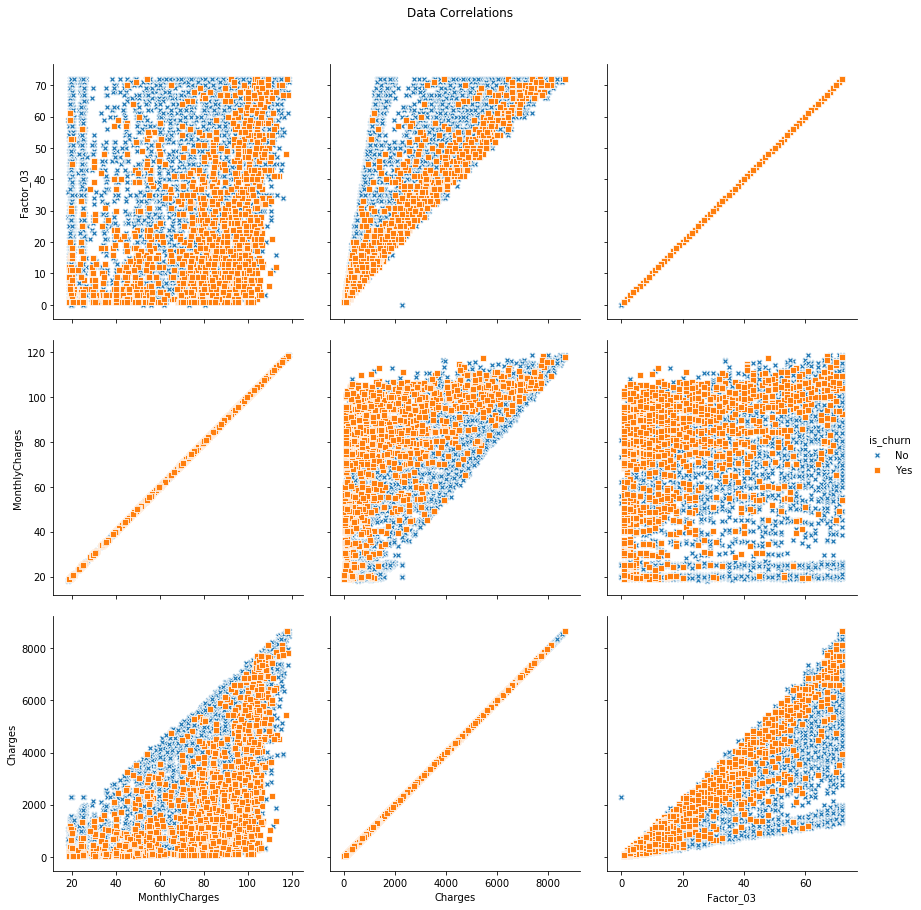

In [173]:
df.dropna()
g = sns.pairplot(df,
                 x_vars=["MonthlyCharges", "Charges", "Factor_03"], 
                 y_vars=["Factor_03", "MonthlyCharges", "Charges"], 
                 hue = 'is_churn', 
                 markers=["X", "s"], height = 4)
g.fig.suptitle("Data Correlations", y = 1.05)
plt.show()


Checking correlations between numerical columns.

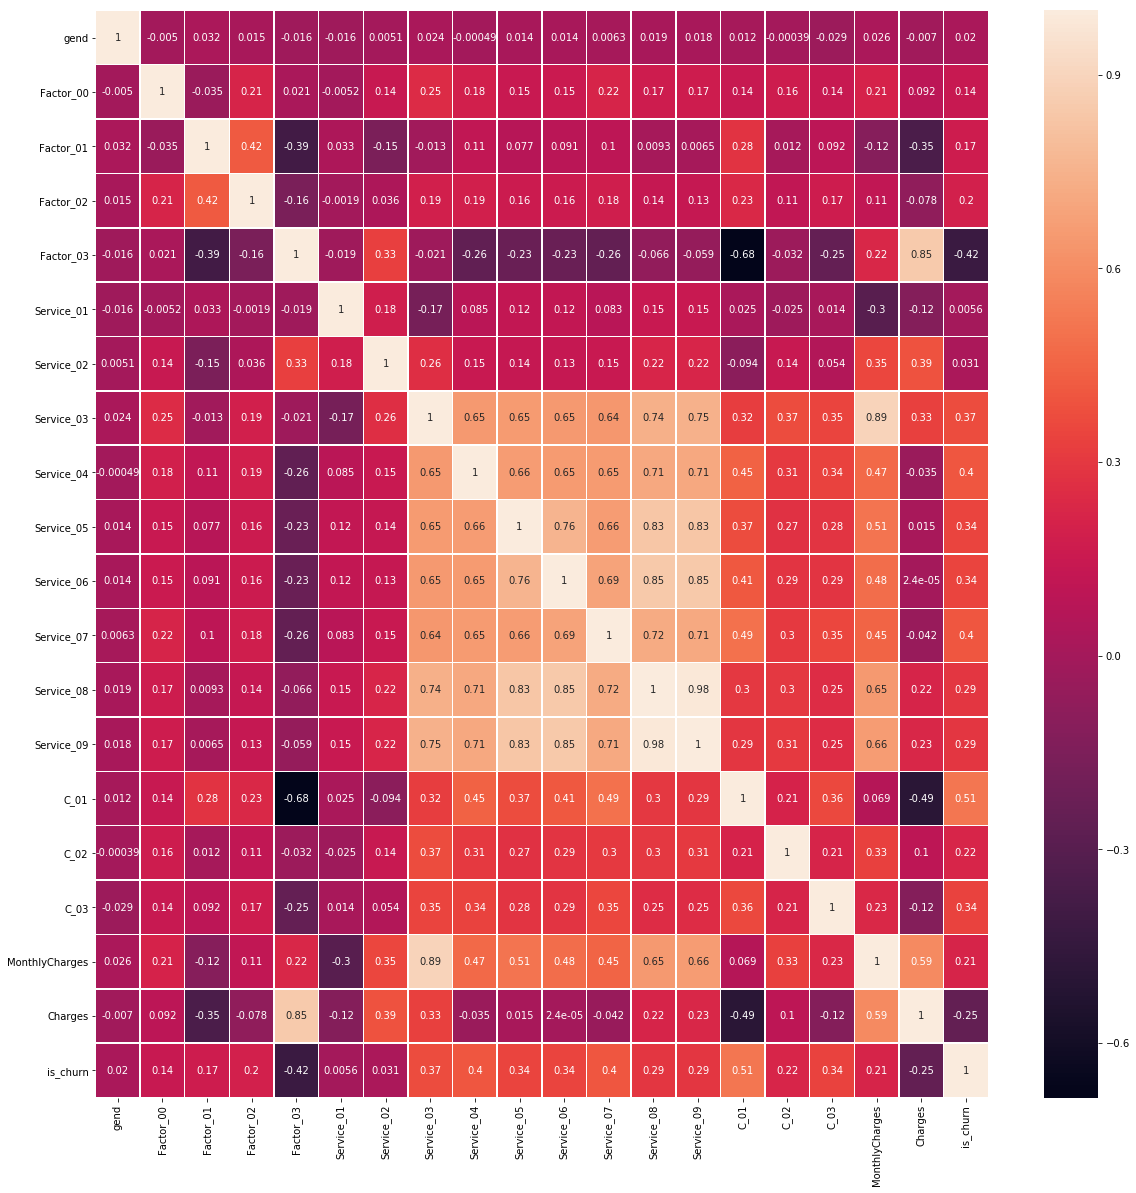

In [172]:
# Calculating the correlation matrix
corr = df1.corr() #df
#print(corr)
# Generating a heatmap
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches

sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
            annot=True, linewidths=.5, ax=ax)
plt.show()

C:\Users\aaydogan.SELCO\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


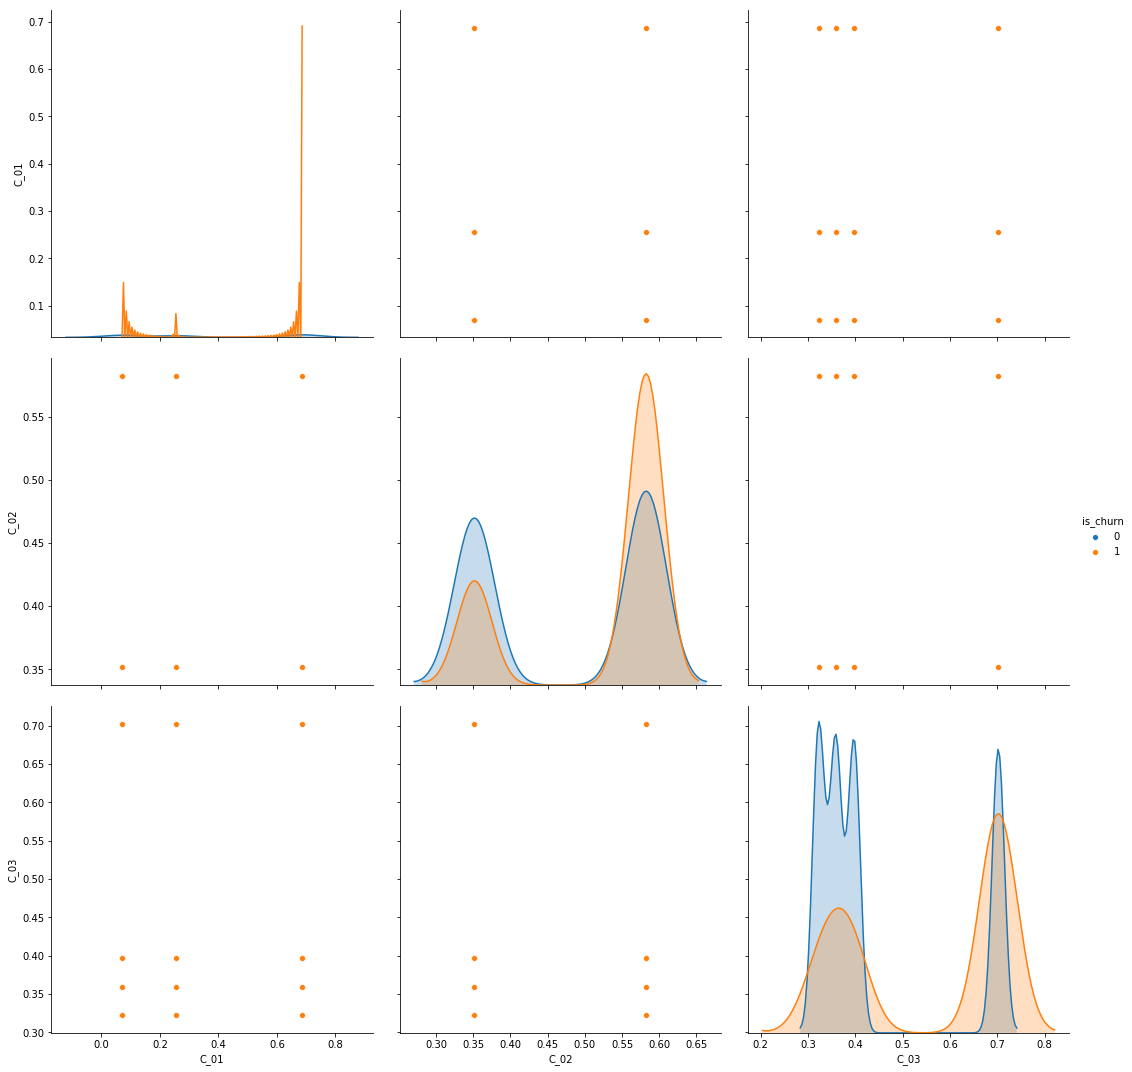

In [188]:
sns.pairplot(df1, 
              x_vars = ["C_01","C_02","C_03"],
              y_vars = ["C_01","C_02","C_03"],
             height = 5,
             hue = 'is_churn'
             )
plt.show() #,"Service_06","Service_07","Service_08","Service_09"

Below; 
- Graph 1 shows that Factor 3 can be used in predicting the churn as churned customers have lower factor values. Altough the gender info does not play inportant role. Variables like, Service 2-3 etc plays role.
- 2ns graph shows Monthly Charges can also be distinctive to some point on churn
- 3th graph shows Charges are also helpful to some point understanding the churn

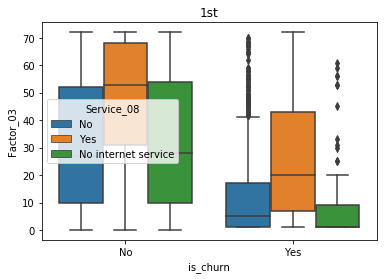

In [186]:
sns.boxplot(x = 'is_churn', y = 'Factor_03', data = df, hue = 'Service_08').set_title('1st') #sym = "", hue = 'gend' 
plt.show()

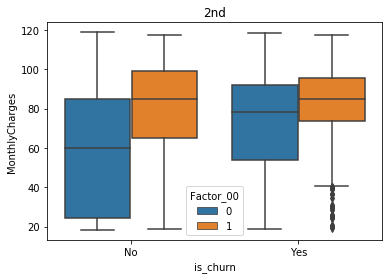

In [214]:
sns.boxplot('is_churn','MonthlyCharges', data = df, hue = 'Factor_00').set_title('2nd')
plt.show()

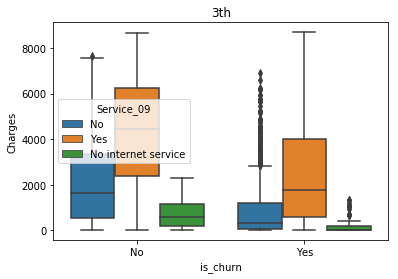

In [210]:
sns.boxplot('is_churn','Charges', data = df, hue = 'Service_09').set_title('3th')
plt.show()

## Distributions of the numeric variables

Looking for normal distributions.

C:\Users\aaydogan.SELCO\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


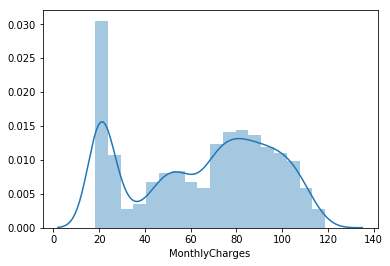

In [212]:
sns.distplot(df['MonthlyCharges'])
plt.show()

C:\Users\aaydogan.SELCO\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


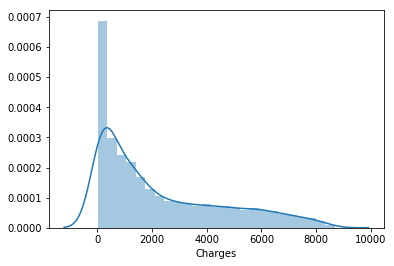

In [199]:
sns.distplot(df['Charges'])
plt.show()

C:\Users\aaydogan.SELCO\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


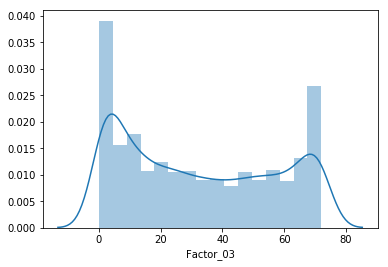

In [200]:
sns.distplot(df['Factor_03'])
plt.show()

### Feature Selection and Feature Engineering / Encoding Binary Features & One Hot Encoding
- Unable to perform feature engineering since no domain knowledge is provided and features are anonym
- Features like Gender can be discarded from future model to be tried
- Mean encoding is used as an encoding method. Also, one hot encoding could be used

In [10]:
#Preprocessing: yes, no mapping for target column
df[['Factor_00','is_churn']] = df[['Factor_00','is_churn']].astype('object')

df['is_churn'].replace(["Yes","No"],[1,0], regex = True, inplace = True)

df['is_churn'] = df['is_churn'].astype('int')

df.head()

,gend,Factor_00,Factor_01,Factor_02,Factor_03,Service_01,Service_02,Service_03,Service_04,Service_05,Service_06,Service_07,Service_08,Service_09,C_01,C_02,C_03,MonthlyCharges,Charges,is_churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


#### Mean Encoding for the Feature Variables

General formula: 
Encoding for Gender = 
[Number of true (1) targets under the label Male / Total Number of targets under the label Male]

In [11]:
#Creating new df object
df1 = df.copy(deep=True)

df1.head()

,gend,Factor_00,Factor_01,Factor_02,Factor_03,Service_01,Service_02,Service_03,Service_04,Service_05,Service_06,Service_07,Service_08,Service_09,C_01,C_02,C_03,MonthlyCharges,Charges,is_churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


In [12]:
#Replacing feature classes with Target Means

for column in df1:
    
    if df1[column].dtype == (object or category):
        means = df1.groupby(column)['is_churn'].mean()
        df1[column] = df1[column].map(means)
    else:
        pass
    
df1.head()

,gend,Factor_00,Factor_01,Factor_02,Factor_03,Service_01,Service_02,Service_03,Service_04,Service_05,Service_06,Service_07,Service_08,Service_09,C_01,C_02,C_03,MonthlyCharges,Charges,is_churn
2,0.501078,0.46233,0.576923,0.560887,2,0.501772,0.483210,0.388654,0.313830,0.416070,0.641759,0.661180,0.586550,0.582609,0.677446,0.585774,0.396396,53.85,108.15,1
4,0.498937,0.46233,0.576923,0.560887,2,0.501772,0.483210,0.667524,0.668956,0.660418,0.641759,0.661180,0.586550,0.582609,0.677446,0.585774,0.702756,70.70,151.65,1
5,0.498937,0.46233,0.576923,0.560887,8,0.501772,0.521793,0.667524,0.668956,0.660418,0.440582,0.661180,0.536232,0.540291,0.677446,0.585774,0.702756,99.65,820.50,1
8,0.498937,0.46233,0.403498,0.560887,28,0.501772,0.521793,0.667524,0.668956,0.660418,0.440582,0.330843,0.536232,0.540291,0.677446,0.585774,0.702756,104.80,3046.05,1
13,0.501078,0.46233,0.576923,0.560887,49,0.501772,0.521793,0.667524,0.668956,0.416070,0.440582,0.661180,0.536232,0.540291,0.677446,0.585774,0.368046,103.70,5036.30,1


Mean Encoding applied for the categorigal features. For the numeric variables, Normalization will be applied with Min - Max Scaling

In [13]:
df1['Factor_03'] = (df1['Factor_03'] - df1['Factor_03'].min())/(df1['Factor_03'].max()-df1['Factor_03'].min())
df1['MonthlyCharges'] = (df1['MonthlyCharges'] - df1['MonthlyCharges'].min())/(df1['MonthlyCharges'].max()-df1['MonthlyCharges'].min())
df1['Charges'] = (df1['Charges'] - df1['Charges'].min())/(df1['Charges'].max()-df1['Charges'].min())

df1.head()

,gend,Factor_00,Factor_01,Factor_02,Factor_03,Service_01,Service_02,Service_03,Service_04,Service_05,Service_06,Service_07,Service_08,Service_09,C_01,C_02,C_03,MonthlyCharges,Charges,is_churn
2,0.501078,0.46233,0.576923,0.560887,0.027778,0.501772,0.483210,0.388654,0.313830,0.416070,0.641759,0.661180,0.586550,0.582609,0.677446,0.585774,0.396396,0.354758,0.010305,1
4,0.498937,0.46233,0.576923,0.560887,0.027778,0.501772,0.483210,0.667524,0.668956,0.660418,0.641759,0.661180,0.586550,0.582609,0.677446,0.585774,0.702756,0.522671,0.015324,1
5,0.498937,0.46233,0.576923,0.560887,0.111111,0.501772,0.521793,0.667524,0.668956,0.660418,0.440582,0.661180,0.536232,0.540291,0.677446,0.585774,0.702756,0.811161,0.092506,1
8,0.498937,0.46233,0.403498,0.560887,0.388889,0.501772,0.521793,0.667524,0.668956,0.660418,0.440582,0.330843,0.536232,0.540291,0.677446,0.585774,0.702756,0.862481,0.349321,1
13,0.501078,0.46233,0.576923,0.560887,0.680556,0.501772,0.521793,0.667524,0.668956,0.416070,0.440582,0.661180,0.536232,0.540291,0.677446,0.585774,0.368046,0.851520,0.578984,1


Now we are ready for model development and classification!

## Classification - Model Development
- ### SVM

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       578
           1       1.00      0.90      0.95       544

    accuracy                           0.95      1122
   macro avg       0.96      0.95      0.95      1122
weighted avg       0.95      0.95      0.95      1122
 



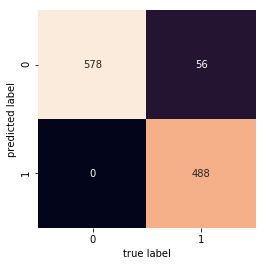

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

X = df1.copy(deep=True)
y = X['is_churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

#Train Model
svmodel = SVC(kernel='poly', degree = 5, gamma = 'auto')
svmodel.fit(X_train, y_train)

#Make prediction
y_pred = svmodel.predict(X_test)

#Model evaluation (Conf. mat, precision and F1 scores)
mat = confusion_matrix(y_test, y_pred)

#heatmap visualization
sns.heatmap(mat.T,square=True,annot=True,fmt ='d',cbar=False,
           xticklabels=True,yticklabels=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

print(classification_report(y_test,y_pred),"\n")

### Testing model accuracy with Cross Validation

In [207]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svmodel, X, y, cv=10)
np.average(scores)

0.9585345868552698

- #### ROC Curve

In [208]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

ROC AUC: 0.948336


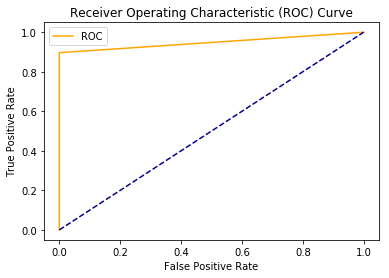

In [209]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)  

### Hyperparameter Tuning
- List of different penalty parameter 'C' are used for svm model.
    - [0.001, 0.01, 0.1, 1, 10, 100, 1000]

Text(0.5,1,'C Parameter AUC Scores')

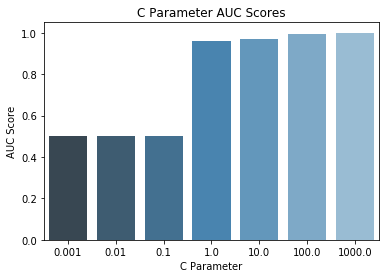

In [29]:
C_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy_list = []

for c in C_list:
    #Train Model
    svmodel = SVC(kernel='poly', degree = 5, gamma = 'auto', C = c)
    svmodel.fit(X_train, y_train)
    #Make prediction
    y_pred = svmodel.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    accuracy_list.append(auc)

sns.barplot(y=accuracy_list, x=[0.001, 0.01, 0.1, 1, 10, 100, 1000], palette="Blues_d")
plt.ylabel('AUC Score')
plt.xlabel('C Parameter')
plt.title('C Parameter AUC Scores')


- Confusion matrix and Precision-Recall scores of C = 1000 model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       550
           1       1.00      1.00      1.00       572

    accuracy                           1.00      1122
   macro avg       1.00      1.00      1.00      1122
weighted avg       1.00      1.00      1.00      1122
 

Class Counts:
1    572
0    550
Name: is_churn, dtype: int64


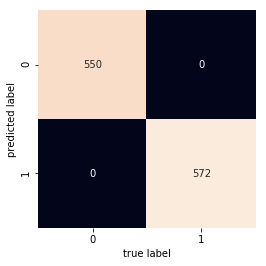

In [47]:
#Train Model
svmodel = SVC(kernel='poly', degree = 5, gamma = 'auto', C = 1000)
svmodel.fit(X_train, y_train)

#Make prediction
y_pred = svmodel.predict(X_test)

#Model evaluation (Conf. mat, precision and F1 scores)
mat = confusion_matrix(y_test, y_pred)

#heatmap visualization
sns.heatmap(mat.T,square=True,annot=True,fmt ='d',cbar=False,
           xticklabels=True,yticklabels=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

print(classification_report(y_test,y_pred),"\n")
print("Class Counts:")
print(y_test.value_counts())

- ### Decision Tree

Creating model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       555
           1       1.00      1.00      1.00       567

    accuracy                           1.00      1122
   macro avg       1.00      1.00      1.00      1122
weighted avg       1.00      1.00      1.00      1122
 

Class Counts:
1    567
0    555
Name: is_churn, dtype: int64


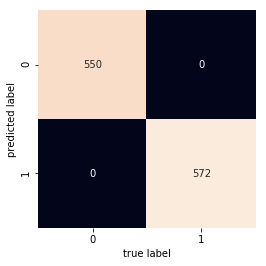

In [67]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

#Fitting model
model.fit(X_train, y_train)

#Predicting Class
y_predict = model.predict(X_test)

#Model evaluation (Conf. mat, precision and F1 scores)
mat1 = confusion_matrix(y_test, y_predict)

#heatmap visualization
sns.heatmap(mat.T,square=True,annot=True,fmt ='d',cbar=False,
           xticklabels=True,yticklabels=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

print(classification_report(y_test,y_predict),"\n")
print("Class Counts:")
print(y_test.value_counts())

ROC AUC: 1.000000


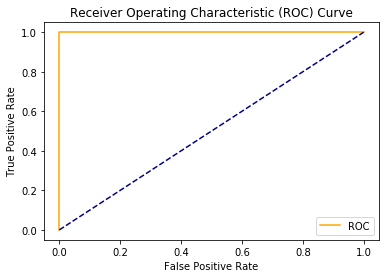

In [74]:
# ROC AUC
auc = roc_auc_score(y_test, y_predict)
print('ROC AUC: %f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plot_roc_curve(fpr, tpr)  